In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array
from tensorflow.keras.layers import Dense, SeparableConv2D,MaxPooling2D,GaussianDropout,Dropout
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,BatchNormalization
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Dataset preparartion


In [7]:
traindata='traindata'
val_data='valdata'

In [8]:
train=ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train.flow_from_directory(traindata,
                                                    batch_size=10,color_mode='rgb' ,
                                                    target_size=(150, 150))

Found 612 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'apple': 0, 'non apple': 1}

In [13]:
val = ImageDataGenerator(rescale=1.0/255)
val_generator = val.flow_from_directory(val_data, 
                                                         batch_size=10, color_mode='rgb' ,
                                                         target_size=(150, 150))

Found 348 images belonging to 2 classes.


In [14]:
val_generator.class_indices

{'apple': 0, 'nonapple': 1}

In [15]:
INIT_LR = 1e-4
EPOCHS = 20
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)


# model


In [5]:
model = Sequential([
    SeparableConv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    SeparableConv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Flatten(),
    GaussianDropout(0.4),
    Dense(150, activation='relu'),
    GaussianDropout(0.4),
    Dense(2, activation='softmax')
])
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 148, 148, 100)     427       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 100)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 74, 100)       400       
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 72, 72, 100)       11000     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 100)       400       
_________________________________________________________________
flatten (Flatten)            (None, 129600)            0

In [16]:
history=model.fit(train_generator,epochs=EPOCHS,validation_data=val_generator)

c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/20
62/62 [==============================] - 33s 503ms/step - loss: 0.6425 - acc: 0.8922 - val_loss: 0.6385 - val_acc: 0.9713
Epoch 2/20
62/62 [==============================] - 29s 474ms/step - loss: 0.1627 - acc: 0.9657 - val_loss: 0.6257 - val_acc: 0.6782
Epoch 3/20
62/62 [==============================] - 30s 477ms/step - loss: 0.0694 - acc: 0.9869 - val_loss: 0.5557 - val_acc: 0.6782
Epoch 4/20
62/62 [==============================] - 30s 480ms/step - loss: 0.1104 - acc: 0.9853 - val_loss: 0.4269 - val_acc: 0.8046
Epoch 5/20
62/62 [==============================] - 29s 469ms/step - loss: 0.0633 - acc: 0.9886 - val_loss: 0.3269 - val_acc: 0.9971
Epoch 6/20
62/62 [==============================] - 30s 488ms/step - loss: 0.0292 - acc: 0.9918 - val_loss: 0.1516 - val_acc: 1.0000
Epoch 7/20
62/62 [==============================] - 30s 479ms/step - loss: 0.0899 - acc: 0.9820 - val_loss: 0.0649 - val_acc: 0.9971
Epoch 8/20
62/62 [==============================] - 30s 492ms/step - 

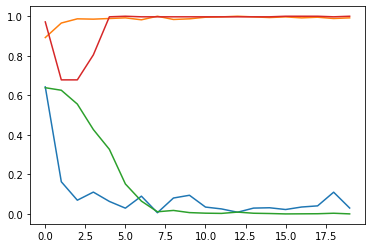

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])

# model testing

#### case1

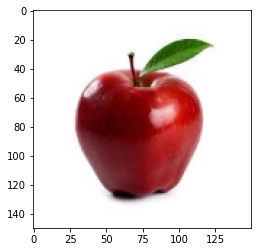

In [134]:
import cv2

img=cv2.imread('ap2.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.resize(img,(150,150))

img=img_to_array(img)/255

plt.imshow(img)

In [136]:
img=img.reshape(-1,150,150,3)

In [137]:
img.shape


(1, 150, 150, 3)

In [138]:
pred=model.predict(img)

In [139]:
pred

array([[1.000000e+00, 5.980728e-14]], dtype=float32)

In [240]:
df=list(train_generator.class_indices)
df

['apple', 'non apple']

In [141]:
df[np.argmax(pred)]

'apple'

### case2

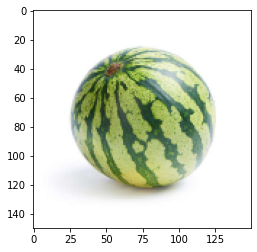

In [142]:
img=cv2.imread('melon.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img=cv2.resize(img,(150,150))

img=img_to_array(img)/255

plt.imshow(img)

In [143]:
img=img.reshape(-1,150,150,3)

In [144]:
p2=model.predict_proba(img)

c:\users\kesha\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [146]:
df[np.argmax(p2)]

'non apple'